## 1. Credit card applications
<p>In this project, we'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository to automate credit card approval process of customers of a bank utilizing (1) Logistic Regression, (2) KNN, (3) Random Forest, and we'll try to improve their prediction performance by applying GridSearchCV.</p> 

The structure of this notebook is as follows:</p>
<ul> 
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build three machine learning models that can predict if an individual's application for a credit card will be accepted.</li>
</ul> 
<p>The contributor of the dataset has anonymized the feature names.</p>

In [1]:
# import packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
#cc_apps = pd.read_csv("datasets/cc_approvals.data", header=None)
cc_apps = pd.read_csv("DESKTOP/cc_approvals.data", header=None)

# Inspect data
cc_apps.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the dataset
<p>The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features.</p>

In [3]:
#rename the column names with the probable features
cc_apps.rename(columns = {cc_apps.columns[0]: 'Gender', cc_apps.columns[1]: 'Age',cc_apps.columns[2]: 'Debt',cc_apps.columns[3]: 'Married',
                          cc_apps.columns[4]: 'BankCustomer', cc_apps.columns[5]: 'EducationLevel', cc_apps.columns[6]: 'Ethnicity',
                          cc_apps.columns[7]: 'YearsEmployed', cc_apps.columns[8]: 'PriorDefault', cc_apps.columns[9]: 'Employed',cc_apps.columns[10]: 'CreditScore', cc_apps.columns[11]: 'DriversLicense', 
               cc_apps.columns[12]: 'Citizen', cc_apps.columns[13]: 'Zipcode', 
               cc_apps.columns[14]: 'Income', cc_apps.columns[15]: 'ApprovalStatus'}, inplace = True)

In [4]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
cc_apps.tail(17)

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Zipcode,Income,ApprovalStatus
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


## 3. Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features <code>Age</code>,<code>Debt</code>, <code>YearsEmployed</code>, <code>CreditScore</code> and <code>Income</code> contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset has missing values which are labeled with '?',and this can be seen in the last cell's output.</li>
</ul>
<p>Now, we'll temporarily replace these missing value question marks with NaN.</p>

In [5]:
# Inspect missing values in the dataset
print(cc_apps.tail(30))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?',np.nan)

# Inspect the missing values again
print(cc_apps.tail(30))

    Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
660      b  22.25   9.000       u            g             aa         v   
661      b  29.83   3.500       u            g              c         v   
662      a  23.50   1.500       u            g              w         v   
663      b  32.08   4.000       y            p             cc         v   
664      b  31.08   1.500       y            p              w         v   
665      b  31.83   0.040       y            p              m         v   
666      a  21.75  11.750       u            g              c         v   
667      a  17.92   0.540       u            g              c         v   
668      b  30.33   0.500       u            g              d         h   
669      b  51.83   2.040       y            p             ff        ff   
670      b  47.17   5.835       u            g              w         v   
671      b  25.83  12.835       u            g             cc         v   
672      a  50.25   0.835

In [6]:
# change the dtype of 'Age' column:
cc_apps['Age'] = cc_apps['Age'].astype('float64')

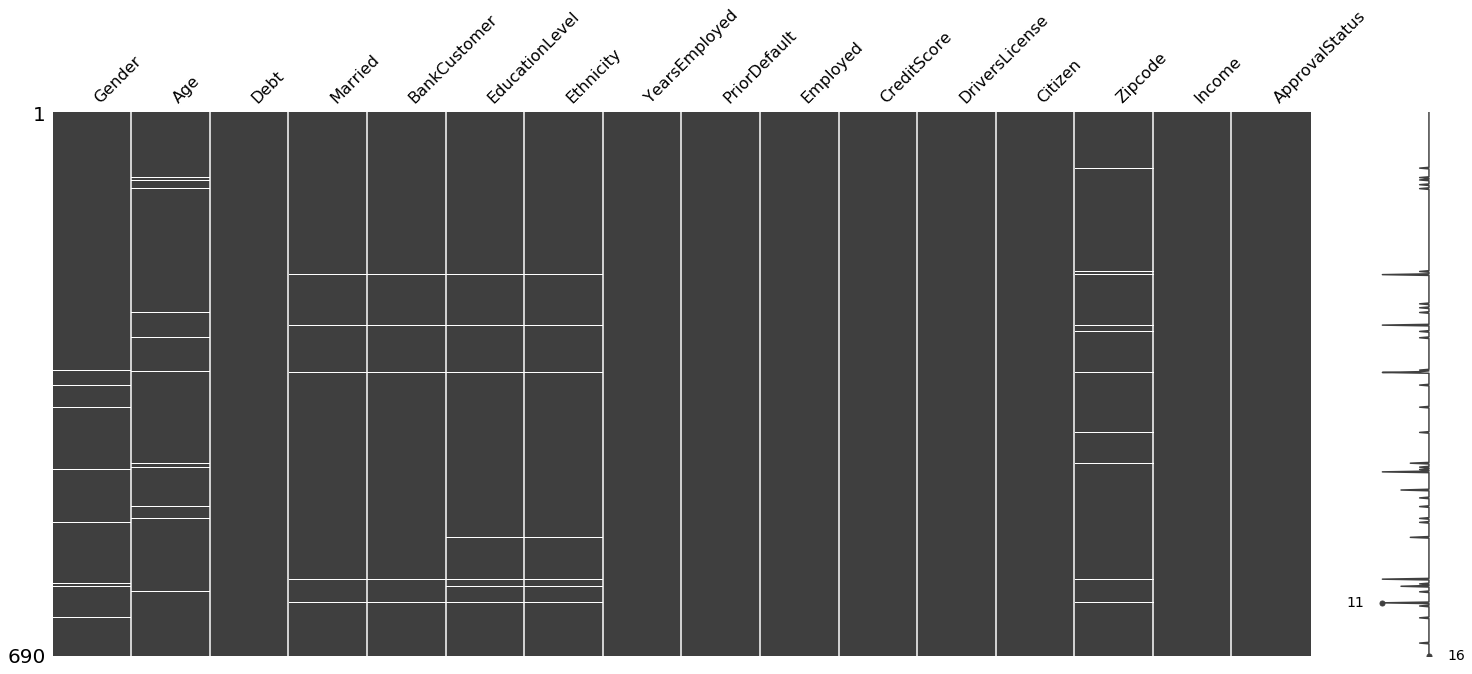

In [7]:
# Visualize missing values as a matrix
msno.matrix(cc_apps)
plt.show()

## 4. Handling the missing values (part ii)
<p>In order to prevent a performance problem on our machine learning models, we are going to impute the missing values with mean imputation if the column is numeric.</p>

In [8]:
# Impute the missing values with mean imputation on numeric columns
cc_apps[['Debt','YearsEmployed','CreditScore','Income']].fillna(cc_apps.mean(), inplace=True)

# Impute the missing values of Age column with mean imputation
cc_apps['Age'].fillna(cc_apps.Age.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
cc_apps.isnull().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
Zipcode           13
Income             0
ApprovalStatus     0
dtype: int64

## 5. Handling the missing values (part iii)
<p> For the missing values on non-numeric columns, like <code>Gender</code>, <code>EducationLevel</code>, <code>Married</code>, <code>BankCustomer</code>, <code>Zipcode</code>, and <code>Ethnicity</code>, we need to implement the most frequent value as an imputation method. </p>

In [9]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify- no NaNs left!
print(cc_apps.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
Zipcode           0
Income            0
ApprovalStatus    0
dtype: int64


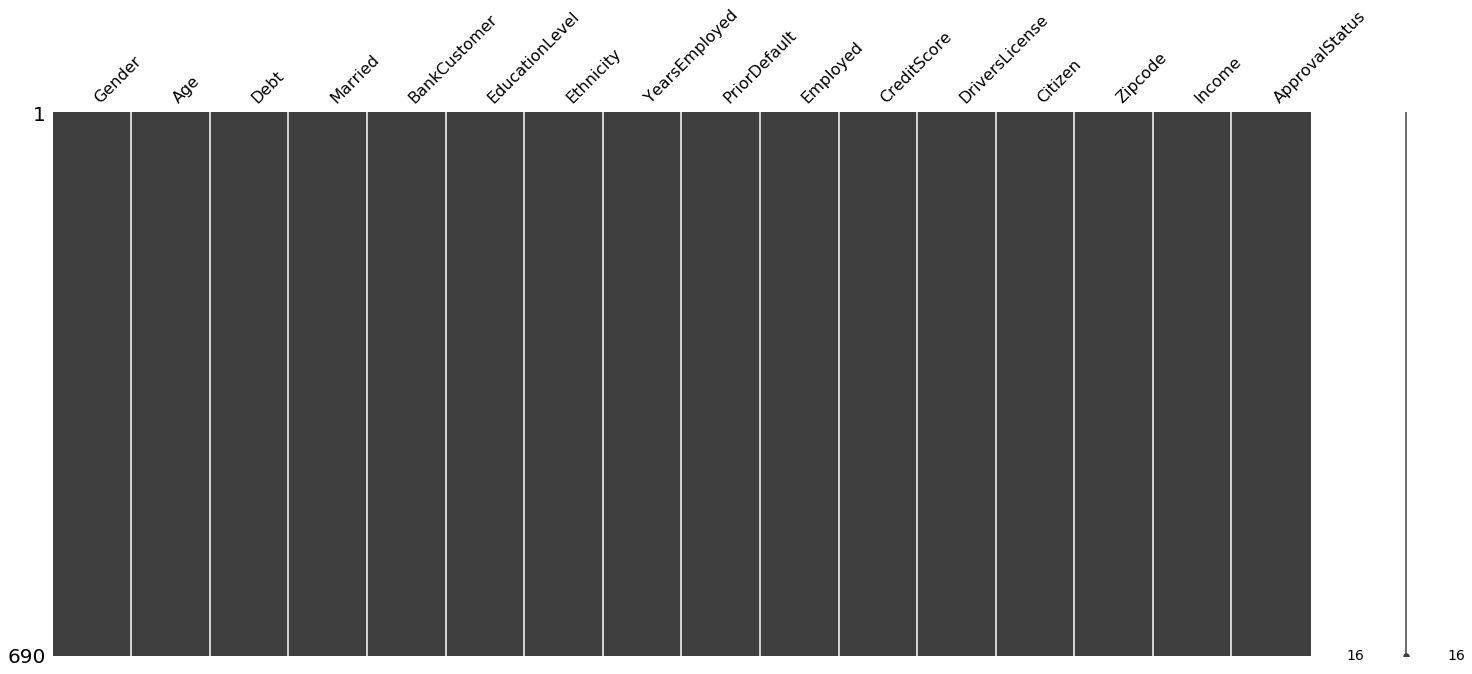

In [10]:
# Visualize again missing values as a matrix
msno.matrix(cc_apps)
plt.show()

## 6. Preprocessing the data (part i)
<p>As we've dealt with the missing values completely, we are going to take care of the issues below as the next steps:</p>

<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones through <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [11]:
cc_apps.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
Zipcode            object
Income              int64
ApprovalStatus     object
dtype: object

In [12]:
# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns.to_numpy():
    # Compare if the dtype is object
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

In [13]:
#check dtypes after converting them into numeric ones:
cc_apps.dtypes

Gender              int32
Age               float64
Debt              float64
Married             int32
BankCustomer        int32
EducationLevel      int32
Ethnicity           int32
YearsEmployed     float64
PriorDefault        int32
Employed            int32
CreditScore         int64
DriversLicense      int32
Citizen             int32
Zipcode             int32
Income              int64
ApprovalStatus      int32
dtype: object

All features are converted from non-numeric to numeric. Therefore, we can continue with feature selection via correlation matrix and heatmap.

## 7. Checking Correlation Matrix for Feature Selection
<p>Before further splitting the data into train and test sets, it's important to get rid of the features that are highly correlated with each other since they will have the very same effect over the target variable when it comes to prediction. As a second step, the features that are showing very weak correlations with the target variable should be detected and removed.</p>


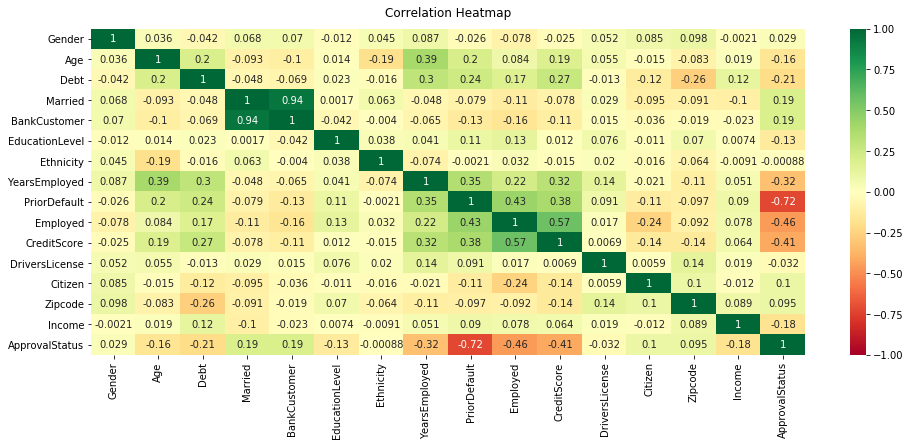

In [14]:
# Visualize a correlation heatmap:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cc_apps.corr(), vmin=-1, vmax=1, annot=True, square=False, cmap='RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

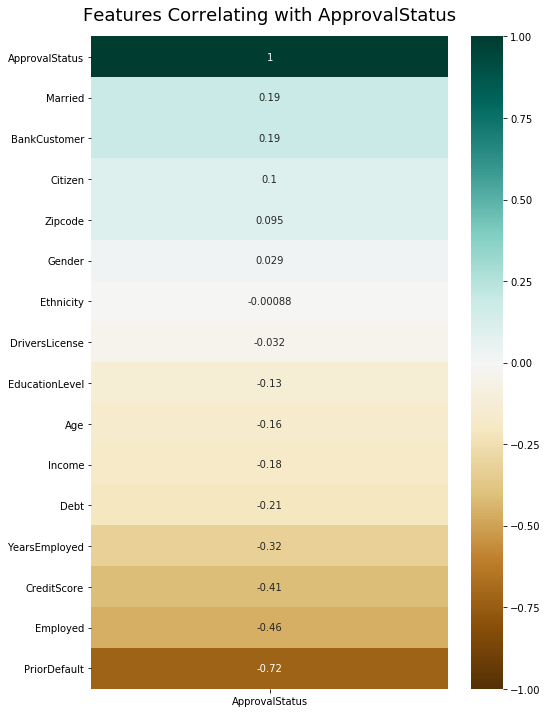

In [15]:
# Check the feature importance by correlation matrix for the target variable
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(cc_apps.corr()[['ApprovalStatus']].sort_values(by='ApprovalStatus', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with ApprovalStatus', fontdict={'fontsize':18}, pad=16);

<p> According to the heatmap above, <code> BankCustomer </code> and <code> Married </code> features are highly correlated with each other (more than 0.9) and has the same weight for the target variable; therefore, we are going to remove one of them. As <code> DriversLicense </code>, <code> ZipCode </code>, <code> Ethnicity </code>, and <code> Gender </code> features are not demonstrating a strong relationship with <code>ApprovalStatus</code> column, we are going to remove them in order to increase the performance of the machine learning model.

It's also clear that features of <code> YearsEmployed</code>, <code> CreditScore</code>, <code> Employed</code>, <code> PriorDefault</code> have more weight over the decision of approval or rejection of a credit card application.

In [16]:
#drop the no correlation-high correlation columns 
cc_apps.drop(['Married','DriversLicense','Zipcode','Ethnicity','Gender'],axis='columns', inplace=True)


In [17]:
#check the dataset
cc_apps.head(5)

,Age,Debt,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,30.83,0.000,1,13,1.25,1,1,1,0,0,0
1,58.67,4.460,1,11,3.04,1,1,6,0,560,0
2,24.50,0.500,1,11,1.50,1,0,0,0,824,0
3,27.83,1.540,1,13,3.75,1,1,5,0,3,0
4,20.17,5.625,1,13,1.71,1,0,0,2,0,0


## 8. Splitting the dataset into train and test sets
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>

In [18]:
# Segregate features and labels into separate variables
y= cc_apps.ApprovalStatus
X= cc_apps.loc[:,'Age':'Income']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=42,stratify=y)

**a) Check the distribution of columns in X:**

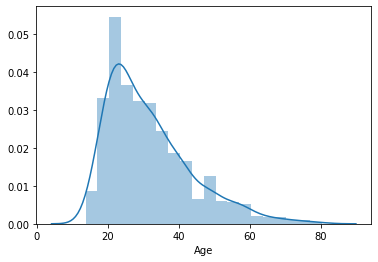

In [19]:
#right skewed distribution of Age column
sns.distplot(X.Age,kde=True)
plt.show()

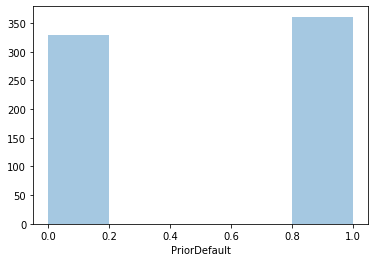

In [20]:
# the dataset is more or less balanced in terms of PriorDefault information
sns.distplot(X.PriorDefault,kde=False)
plt.show()

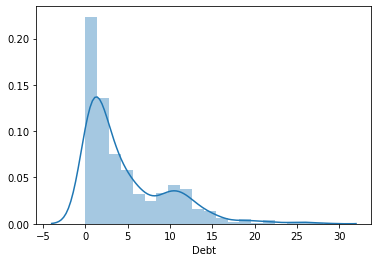

In [21]:
sns.distplot(X.Debt,kde=True)
plt.show()

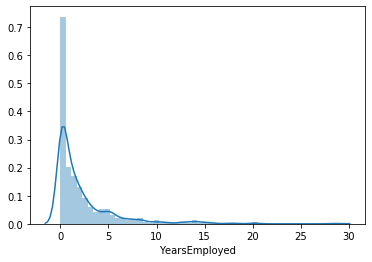

In [22]:
sns.distplot(X.YearsEmployed,kde=True)
plt.show()

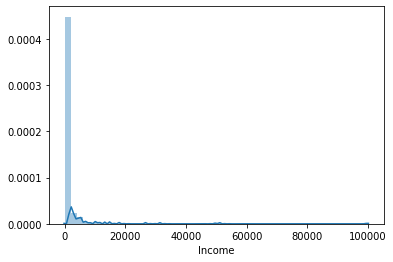

In [23]:
sns.distplot(X.Income,kde=True)
plt.show()

In [24]:
# current shape of X_Train and y_train
print(X_train.shape, y_train.shape)

(552, 10) (552,)


In [25]:
# current shape of X_test and y_test
print(X_test.shape, y_test.shape)

(138, 10) (138,)


## 9. Standardization and Normalization for Comparison
<p>As we've split the data into train and test sets and checked the distribution of each element in X, it is acknowledged that the elements in the dataset do not have a Gaussian distribution. To improve the accuracy of the models later, we will create two sets of training through standardization and normalization to compare their impact over the models.</p>

#### a) Standardization

In [26]:
# Instantiate StandardScaler and use it to standardize X_train and X_test
scaler_sd = StandardScaler()

num_cols=['Age','Debt','YearsEmployed','Income']

# copy of datasets
sdX_train = X_train.copy()
sdX_test = X_test.copy()

for i in num_cols:
    
    # fit on training data column
    scale = scaler_sd.fit(sdX_train[[i]])
    
    # transform the training data column
    sdX_train[i] = scale.transform(sdX_train[[i]])
    
    # transform the testing data column
    sdX_test[i] = scale.transform(sdX_test[[i]])

#### b) Normalization

In [27]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler_mm = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler_mm.fit_transform(X_train)
rescaledX_test = scaler_mm.fit_transform(X_test)

Now, we have three separe sets at hand: 1) unscaled X, 2) standardized X, 3) normalized X. These three sets will be evaluated through models for comparison in terms of model accuracy and RMSE.

## 10. Fitting a Logistic Regression, KNN, Random Forest to the train sets
**a) Logistic Regression**

In [28]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(tol=0.001,max_iter=150)

# Fit logreg to the train set
logreg_unscaled = logreg.fit(X_train,y_train)
logreg_scaled = logreg.fit(rescaledX_train,y_train)
logreg_standardized = logreg.fit(sdX_train,y_train)

# Predict on the test data: y_pred
y_pred_unscaled = logreg_unscaled.predict(X_test)
y_pred_scaled  = logreg_scaled.predict(rescaledX_test)
y_pred_standardized  = logreg_standardized.predict(sdX_test)

print('Logreg Accuracy with Scaling: {}'.format(logreg_scaled.score(rescaledX_test,y_test)))
print('Logreg Accuracy without Scaling: {}'.format(logreg_unscaled.score(X_test,y_test)))
print('Logreg Accuracy with Standardization: {}'.format(logreg_standardized.score(sdX_test,y_test)))

# Compute and print the classification report
print('\n' + '=====================UNSCALED DATA=======================' + '\n')
print(classification_report(y_test, y_pred_unscaled))
print('\n' + '======================SCALED DATA======================' + '\n')
print(classification_report(y_test, y_pred_scaled))
print('\n' + '======================STANDARDIZED DATA=================' + '\n')
print(classification_report(y_test, y_pred_standardized))

Logreg Accuracy with Scaling: 0.7898550724637681
Logreg Accuracy without Scaling: 0.6884057971014492
Logreg Accuracy with Standardization: 0.8043478260869565

=====================UNSCALED DATA=======================

              precision    recall  f1-score   support

           0       0.60      0.89      0.72        61
           1       0.85      0.53      0.66        77

    accuracy                           0.69       138
   macro avg       0.73      0.71      0.69       138
weighted avg       0.74      0.69      0.68       138


======================SCALED DATA======================

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        61
           1       0.88      0.73      0.79        77

    accuracy                           0.79       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.80      0.79      0.79       138


======================STANDARDIZED DATA=================

           

**CONCLUSION:** What we can see from the results is that normalization through min-max scaling, and standardization have the same accuracy. It is understood that whichever is performed, standardization or normalization yields <code>higher accuracy</code> in our logistic regression model compared to unscaled cc_apps data.

**b) K-Nearest Neighbors**

In [29]:
# Create a k-NN classifier with 8 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the training data
knn_unscaled = knn.fit(X_train,y_train)
knn_scaled = knn.fit(rescaledX_train,y_train)
knn_standardized = knn.fit(sdX_train,y_train)

# Predict on the test data: y_pred
y_pred_unscaled_ = knn_unscaled.predict(X_test)
y_pred_scaled_ = knn_scaled.predict(rescaledX_test)
y_pred_standardized_  = knn_standardized.predict(sdX_test)

print('KNN Accuracy with Scaling: {}'.format(knn_scaled.score(rescaledX_test,y_test)))
print('KNN Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))
print('KNN Accuracy with Standardization: {}'.format(knn_standardized.score(sdX_test,y_test)))

# Compute and print the classification report
print('\n' + '=====================UNSCALED DATA=======================' + '\n')
print(classification_report(y_test, y_pred_unscaled_))
print('\n' + '======================SCALED DATA======================' + '\n')
print(classification_report(y_test, y_pred_scaled_))
print('\n' + '======================STANDARDIZED DATA===================' + '\n')
print(classification_report(y_test, y_pred_standardized_))

KNN Accuracy with Scaling: 0.5869565217391305
KNN Accuracy without Scaling: 0.5217391304347826
KNN Accuracy with Standardization: 0.7898550724637681

=====================UNSCALED DATA=======================

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        61
           1       1.00      0.14      0.25        77

    accuracy                           0.52       138
   macro avg       0.74      0.57      0.45       138
weighted avg       0.77      0.52      0.43       138


======================SCALED DATA======================

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        61
           1       0.57      1.00      0.73        77

    accuracy                           0.59       138
   macro avg       0.79      0.53      0.43       138
weighted avg       0.76      0.59      0.46       138


======================STANDARDIZED DATA===================

              prec

**CONCLUSION:** With KNN algorithm, modelling has higher accuracy, precision, F1-score and lower RMSE with the standardized dataset.

**c) Random Forest**

In [30]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rf_unscaled = rf.fit(X_train,y_train)
rf_scaled = rf.fit(rescaledX_train,y_train)
rf_standardized = rf.fit(sdX_train,y_train)

# Predict on the test data: y_pred
y_pred_unscaledrf = rf_unscaled.predict(X_test)
y_pred_scaledrf = rf_scaled.predict(rescaledX_test)
y_pred_standardizedrf  = rf_standardized.predict(sdX_test)

print('RF Accuracy with Scaling: {}'.format(rf_scaled.score(rescaledX_test,y_test)))
print('RF Accuracy without Scaling: {}'.format(rf_unscaled.score(X_test,y_test)))
print('RF Accuracy with Standardization: {}'.format(rf_standardized.score(sdX_test,y_test)))

# Compute and print the classification report
print('\n' + '=====================UNSCALED DATA=======================' + '\n')
print(classification_report(y_test, y_pred_unscaledrf))
print('\n' + '======================SCALED DATA======================' + '\n')
print(classification_report(y_test, y_pred_scaledrf))
print('\n' + '======================STANDARDIZED DATA===================' + '\n')
print(classification_report(y_test, y_pred_standardizedrf))


RF Accuracy with Scaling: 0.7898550724637681
RF Accuracy without Scaling: 0.7898550724637681
RF Accuracy with Standardization: 0.8260869565217391

=====================UNSCALED DATA=======================

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        61
           1       0.88      0.73      0.79        77

    accuracy                           0.79       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.80      0.79      0.79       138


======================SCALED DATA======================

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        61
           1       0.88      0.73      0.79        77

    accuracy                           0.79       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.80      0.79      0.79       138


======================STANDARDIZED DATA===================

              precisi

**CONCLUSION:** As an ensemble method, our Random Forest model yields higher accuracy with standardized test set.

## 11. Hyperparameter Tuning and Improving Model Performance

In order to improve the performance of these three models, we will implement grid search cross-validation. 

**a) Logistic Regression Model with GridSearchCV**

In [37]:
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol,max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10, scoring='accuracy')

# Use scaler to rescale X and assign it to rescaledX
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.849275 using {'max_iter': 100, 'tol': 0.01}


**b) KNN Model with GridSearchCV**
<p>As the highest accuracy has been achieved through the standardization of the data, we will standardize "X" this time.</p>

In [38]:
# define the possible parameter range for n_neighbors and possible weight options
neighbors = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = neighbors, weights = weight_options)

# Instantiate the classifier for KNN
knnn=KNeighborsClassifier()

scaler_stan = StandardScaler()
standardized_X = scaler_stan.fit_transform(X)

grid = GridSearchCV(knnn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(standardized_X,y)

# Summarize results
best_score_knn, best_params_knn = grid.best_score_,grid.best_params_
print("Best KNN score: %f using %s" % (best_score_knn, best_params_knn))

Best KNN score: 0.862319 using {'n_neighbors': 14, 'weights': 'uniform'}


**c) Random Forest with GridSearchCV**
<p>As the highest accuracy has been achieved through the standardization of the data, we will standardize "X" this time.</p>

In [39]:
# define the possible parameter range for estimators
estimators = [50, 100, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(n_estimators=estimators)

#Instantiate the classifier for random forest
rff=RandomForestClassifier()

scaler_rf = StandardScaler()
rf_stan_X = scaler_rf.fit_transform(X)

# Instantiate GridSearchCV with the required parameters
grid_rf = GridSearchCV(rff, param_grid, cv = 10, scoring = 'accuracy')

# Fit data to grid_model
grid_rf.fit(rf_stan_X,y)

# Summarize results
best_score_rf, best_params_rf = grid_rf.best_score_, grid_rf.best_params_
print("Best RF score: %f using %s" % (best_score_rf, best_params_rf))


Best RF score: 0.839130 using {'n_estimators': 50}


**CONCLUSION**: With GridSearchCV, Logistic Regression model receives 85%, KNN model receives 86%, and Random Forest model receives 84% accuracy. 

When hyperparameter-tuning is performed, KNN algorithm is slightly ahead of the other two models in terms of accuracy and precision. Since the dataset is quite small, the performance of the models do not differ extremely.